In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
def rho_green_light(nx, rho_light):
    rho = numpy.arange(nx)*2./nx*rho_light
    rho[int((nx-1)/2):] = 0
    return rho

In [3]:
#Basic initial condition parameters
#defining grid size, time steps
nx = 81
nt = 30
dx = 4.0/(nx-1)

x = numpy.linspace(0,4,nx)
rho_max = 10.
u_max = 1.
rho_light = 10.

In [4]:
rho = rho_green_light(nx, rho_light)

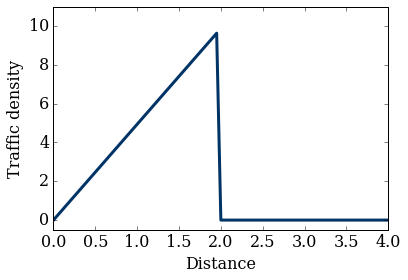

In [5]:
pyplot.plot(x, rho, color='#003366', ls='-', lw=3)
pyplot.ylabel('Traffic density')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5,11.);

In [6]:
def computeF(u_max,rho_max,rho):
    return u_max*rho*(1-rho/rho_max)

In [7]:
def ftbs(rho,nt,dt,dx,rho_max,u_max):
    
    rho_n = numpy.zeros((nt,len(rho)))
    rho_n[0,:] = rho.copy()
    
    for t in range(1,nt):
        F = computeF(u_max,rho_max,rho)
        rho_n[t,1:] = rho[1:] -dt/dx*(F[1:]-F[:-1])
        rho_n[t,0] = rho[0]
        rho = rho_n[t].copy()
        
    return rho_n

In [8]:
sigma = 1.
dt = sigma*dx

rho_n = ftbs(rho, nt, dt, dx, rho_max, u_max)

In [9]:
from matplotlib import animation
from IPython.display import HTML

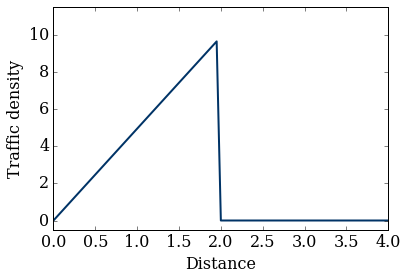

In [10]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-.5,11.5),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)

In [11]:
HTML(anim.to_html5_video())

In [13]:
rho_light = 5
nt =40
rho = rho_green_light(nx, rho_light)
rho_n = ftbs(rho,nt,dt,dx,rho_max,u_max)

anim = animation.FuncAnimation(fig,animate,frames = rho_n,interval=50)
HTML(anim.to_html5_video())

In [16]:
rho_light =4
u_max =1.09
nt = 40
rho = rho_green_light(nx,rho_light)
rho_n = ftbs(rho,nt,dt,dx,rho_max,u_max)

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
HTML(anim.to_html5_video())